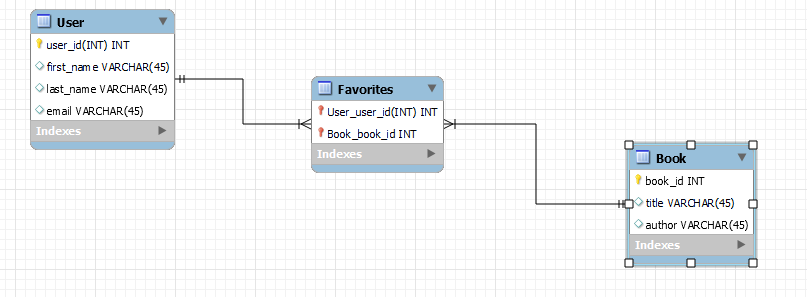

In [27]:
!pip install sqlalchemy
!pip install pymysql

In [32]:
# Import Libraries
import pandas as pd
from sqlalchemy import create_engine

In [52]:
# Connection String 
username = 'root'
password = 'NnbmXY7K_urHTThq'
database_name = 'books'
host = 'localhost'
port = '3306'
connection = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}"

In [53]:
# Create engine
engine = create_engine(connection)

In [54]:
# Create the 'books' database
engine.execute("CREATE DATABASE IF NOT EXISTS books")

In [55]:
# Switch to the 'books' database
engine.execute("USE books")

In [56]:
# Loading datasets
users_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_c2WTx_eiH8pUM-PTgyt7T4aIl1A3Cp1ukPVPEijoYc/gviz/tq?tqx=out:csv&sheet=users')
books_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_D-vW7GXiQfG6D9nzjscgVctKLb6TZl_o8ERNH_tet8/gviz/tq?tqx=out:csv&sheet=books')
authors_df = pd.read_csv('https://docs.google.com/spreadsheets/d/17rABPt5eaIxfhGO75dYCbH-5IloKsAR0HH9V6VC43ZI/gviz/tq?tqx=out:csv&sheet=authors')
favorites_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1SLb3RAhcrZsPWRwR0_njWX7KssUYZ16JFsVqBkSU2GI/gviz/tq?tqx=out:csv&sheet=favorite')

In [57]:
# Create tables in the 'books' database
users_df.to_sql('users', engine, if_exists='replace', index=False)
books_df.to_sql('books', engine, if_exists='replace', index=False)
authors_df.to_sql('authors', engine, if_exists='replace', index=False)
favorites_df.to_sql('favorites', engine, if_exists='replace', index=False)

7

In [58]:
# Close the engine
engine.dispose()

# Testing Database

In [59]:
result = engine.execute("SHOW TABLES")
for row in result:
    print(row)

('authors',)
('books',)
('favorites',)
('users',)


In [60]:
query = """
SELECT books.title
FROM books
JOIN favorites ON books.id = favorites.book_id
WHERE favorites.user_id = (
    SELECT users.id FROM users WHERE (users.last_name = 'Doe' AND users.first_name = 'John')
)
"""

result = engine.execute(query)
for row in result:
    print(row[0])

The Shining
It
The Great Gatsby
